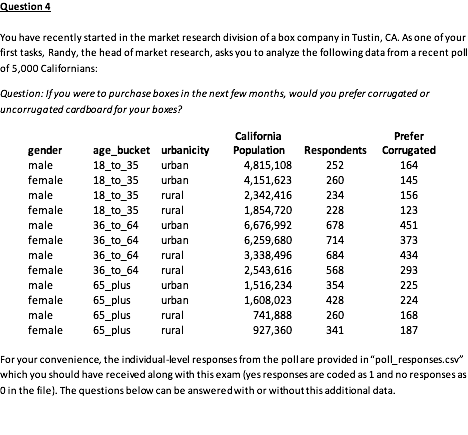

### **Part A.** What is your best estimate for the percentage of Californians who prefer corrugated cardboard for their boxes? What is the 95% confidence interval for this estimate? Please show your work.

In [13]:
import statsmodels #you seem to need this AND the next line
#from statsmodels.stats.proportion import proportions_ztest
import pandas as pd

In [8]:
poll = pd.read_csv("poll_responses.csv")
poll.head(2)

,gender,age_bucket,urbanicity,prefer_corrugated
0,male,18_to_35,urban,1
1,male,18_to_35,urban,1


In [9]:
x = poll.prefer_corrugated
x.head(4) #need a few more rows to properly see it

0    1
1    1
2    1
3    1
Name: prefer_corrugated, dtype: int64

In [14]:
count = x.sum()
nobs = x.count()
statsmodels.stats.proportion.proportion_confint(\
            count, nobs, alpha=0.05, method='normal') 
#alpha is significance level; #method is normal for Z test
#lower bound, upper bound of 95% confidence interval

(0.5748433633316954, 0.6021212437468888)

### Part B. Are men and women significantly different in their likelihood to prefer corrugated cardboard?

First, we will sove this with a z test, since that's the way I did it on the exam. Then we will sove it with a t test, since that can also be permissible. 

In [11]:
#first we start to do the analogy to a SQL where clause to get the genders set up
poll[poll["gender"]=='male'].head(3)

,gender,age_bucket,urbanicity,prefer_corrugated
0,male,18_to_35,urban,1
1,male,18_to_35,urban,1
2,male,18_to_35,urban,1


In [12]:
poll[poll["gender"]=='female'].head(3)

,gender,age_bucket,urbanicity,prefer_corrugated
252,female,18_to_35,urban,1
253,female,18_to_35,urban,1
254,female,18_to_35,urban,1


In [15]:
#now we need to 'select' for only the 'prefer_corrugated' column
poll[poll["gender"]=='male']['prefer_corrugated'].head(3)

0    1
1    1
2    1
Name: prefer_corrugated, dtype: int64

In [16]:
poll[poll["gender"]=='female']['prefer_corrugated'].head(3)

252    1
253    1
254    1
Name: prefer_corrugated, dtype: int64

In [17]:
#we'll store these as variables for easier use later
men = poll[poll["gender"]=='male']['prefer_corrugated']
women = poll[poll["gender"]=='female']['prefer_corrugated']

In [18]:
#now for use in the proportions test, we need to make a mini dataframe
#counts is the number of successes
#in a binomial setup where it's just 1s and 0s, we can just use sum() to get this
#nobs is the total number of trials, len() can work, though I chose to use counts()
gender_polls = pd.DataFrame({
    "count": [men.sum(), women.sum()],#those that prefer corrugated
     "nobs": [men.count(), women.count()]
    }, index=['men', 'women'])

In [19]:
gender_polls

,count,nobs
men,1598,2462
women,1345,2539


In [20]:
#now we use this to feed into the stats test
#for some odd reason if you say gender_polls.count it will blow up...
#so you have to say gender_polls['count'] 
statsmodels.stats.proportion.proportions_ztest(gender_polls['count'], gender_polls['nobs'])
#z score, p-value

(8.573032591956961, 1.0079496366897543e-17)

So we can def reject the null, if we have a 8.57 z score, and p value with 16 zeros in front.

In [22]:
from scipy import stats

In [23]:
#you may be surprised, but we can actually use our work from above 
#when we defined 'men' and 'women' to be the arrays of 1s and 0s for who
#preferred corrugated, siloed out for men and women, respectively
stats.ttest_ind(men, women)

Ttest_indResult(statistic=8.635004923552513, pvalue=7.790736712355893e-18)

So as we might expect, there's a little difference using the t distrbution, but you can still see basically we have a 8.63 t score for whatever the degress of freedom were and a very low p value. 

What this test is saying in both the z and t examples above is that there is a very low chance that we'd see a differnece this wide between men and women by a mere random fluctuation. 

So we can reject the null, and say there's probably a 'there, there'!

In [24]:
#btw, just for the heck of it, let me show you what those numbers really were:
gender_polls['proportion'] = round(gender_polls['count'] / gender_polls['nobs'],2)
gender_polls

,count,nobs,proportion
men,1598,2462,0.65
women,1345,2539,0.53


So, as you can see, a 65% to 53% difference does not look like random fluctuation. It looks like men really do like corrugation more than women do. 